<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P6E5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

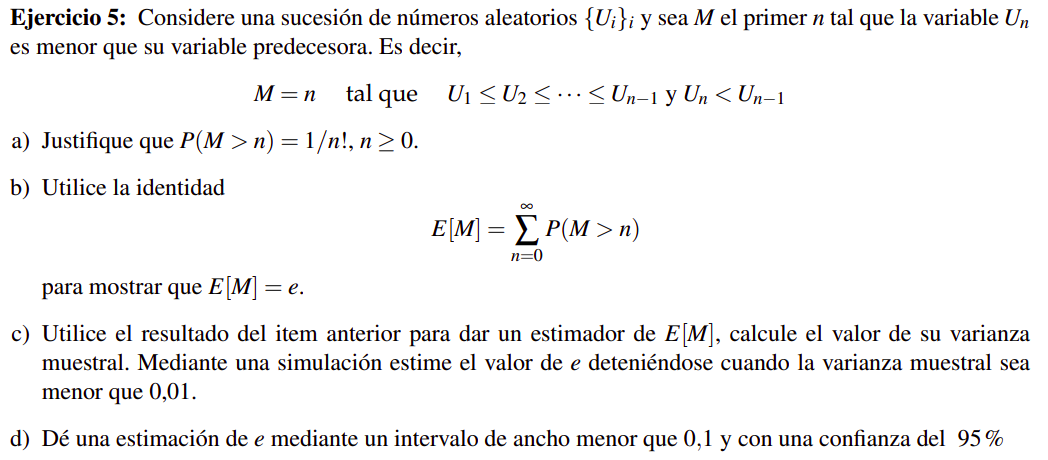

In [26]:
# c
from random import random, seed
import numpy as np
from scipy import stats

def experimento_M():
  u = random()
  v = random()
  contador = 2
  while u < v:
    u = v
    v = random()
    contador += 1
  return contador

def estimar_media_muestral_con_error_estandar(error_estandar):
  media = experimento_M()
  Scuad, n = 0, 1

  while n <= 100 or np.sqrt(Scuad / n) > error_estandar:
    n += 1
    muestra = experimento_M()
    media_anterior = media

    media += (muestra - media_anterior) / n
    Scuad = Scuad * (1 - 1/(n-1)) + n*(media - media_anterior)**2

  return n, media, Scuad

seed(1)
n, media, Scuad = estimar_media_muestral_con_error_estandar(0.01)
print(f"n =        {n:.6f}")
print(f"media =    {media:.6f}")
print(f"Scuad =    {Scuad:.6f}")
print(f"e:         {np.e:.6f}")

n =        7601.000000
media =    2.722405
Scuad =    0.760036
e:         2.718282


In [27]:
# d
def estimar_media_muestral_con_IC(long_interv, z_alpha_2):
  seed(1)
  error_estandar_maximo = long_interv / (2 * z_alpha_2) # maximo error cuadratico medio de la media
  media = experimento_M()
  Scuad, n = 0, 1
  intervalo = 0
  while n <= 100 or np.sqrt(Scuad/n) > error_estandar_maximo:
    n += 1
    muestra = experimento_M()
    media_anterior = media

    media += (muestra - media_anterior) / n
    Scuad = Scuad * (1 - 1 /(n-1)) + n*(media - media_anterior)**2
    intervalo = (media - z_alpha_2*np.sqrt(Scuad / n), media + z_alpha_2*np.sqrt(Scuad / n))

  return n, media, Scuad, intervalo

confianza = 0.95
alpha = 1 - confianza
z_alpha_2 = abs(stats.norm.ppf(alpha/2))

long_interv = 0.1
seed(1)
n, media, Scuad, intervalo = estimar_media_muestral_con_IC(long_interv, z_alpha_2)
print(f"n =        {n:.6f}")
print(f"media =    {media:.6f}")
print(f"Scuad =    {Scuad:.6f}")
print(f"IC =       ({intervalo[0]:.6f}, {intervalo[1]:.6f})")
print(f"long. IC = {intervalo[1]-intervalo[0]:.6f}")
print(f"e:         {np.e:.6f}")

n =        1297.000000
media =    2.762529
Scuad =    0.843255
IC =       (2.712553, 2.812504)
long. IC = 0.099951
e:         2.718282
